# Import Libraries

All library imports are done in here

In [23]:
# Built-in Library Imports
import os
import requests

# Base Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.base import BaseEstimator
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Sklearn Model Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Dotenv Import, allowing the use of .env files.
from dotenv import load_dotenv
load_dotenv()

True

# Variables

All global variables are to be defined in this section.

In [24]:
defaultTrainData = "./datapack/spotify_songs.csv"

audio_features = [
    'track_popularity',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

# Functions

All functions to define are done in this section. This section is divided into two categories:

- [API Functions](#api-functions)
- [Model Functions](#model-functions)
- [Project Functions](#project-functions)

## API Functions

All API related functions are created in this category, such as the `getToken` function where it fetches the user's access token by feeding it the `CLIENT_ID` and `CLIENT_SECRET` tokens.

In [25]:
def getToken() -> str:
    """
    Fetches the user's `ACCESS_TOKEN` by sending a POST request to Spotify's API.
    Access token is required to make requests to Spotify's API.
    To be able to get the token, you need to have a `CLIENT_ID` and `CLIENT_SECRET`
    which can be obtained by creating a Spotify Developer account, which will then be
    put in a `.env` file in the root directory of the project.
    
    :return str: The access token of the user.
    :raises Exception: If the request does not return a status code of 200.
    """

    url = "https://accounts.spotify.com/api/token"
    header = {"Content-type": "application/x-www-form-urlencoded"}
    data = {
        "grant_type": "client_credentials",
        "client_id": os.getenv("CLIENT_ID"),
        "client_secret": os.getenv("CLIENT_SECRET")
    }

	# Send request to get token
    res = requests.post(
        url,
        headers = header,
        data = data
    )

    # if request does not return 200, raise exception
    if res.status_code != 200:
        raise Exception("getToken: ", res.text)

    # Example Output: 'BQCq8oiJHxi.....iv_5sAuoF1YwhQADyc'
    return res.json()['access_token']

def getAF(track_id: str) -> dict:
    """
    Fetches the audio features of a track by sending a GET request to Spotify's API.
    The audio features include the following:
    - **`acousticness`** [0.0 - 1.0] -      A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    - **`analysis_url`** [string] -         An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.
    - **`danceability`** [0.0 - 1.0] -      Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    - **`duration_ms`** [int] -             The duration of the track in milliseconds.
    - **`energy`** [0.0 - 1.0] -            Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
    - **`id`** [string] -                   The Spotify ID for the track.
    - **`instrumentalness`** [0.0 - 1.0] -  Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
    - **`key`** [int] -                     The key the track is in. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    - **`liveness`** [0.0 - 1.0] -          Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    - **`loudness`** [-60.0 - 0.0] -        The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
    - **`mode`** [int] -                    Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    - **`speechiness`** [0.0 - 1.0] -       Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.
    - **`tempo`** [float] -                 The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    - **`time_signature`** [int] -          An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
    - **`track_href`** [string] -           A link to the Web API endpoint providing full details of the track.
    - **`type`** [string] -                 The object type: “audio_features”
    - **`uri`** [string] -                  The Spotify URI for the track.
    - **`valence`** [0.0 - 1.0] -           A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    :param track_id: The Spotify ID for the track. (Example: "06AKEBrKUckW0KREUWRnvT")
    :type track_id: str
    
    :return dict: The audio features of the track.
    """

    url = "https://api.spotify.com/v1/audio-features/"+track_id
    header = {"Authorization": "Bearer " + getToken() }
    res = requests.get(
        url,
        headers = header
    )

    if res.status_code != 200:
        raise Exception("getAF: ",res.text)
    
    return res.json()


## Model Functions

All functions relating to training a model can be defined here. This separation from [Project Functions](#project-functions) allows organization of codes and a non-cluttered workspace.

In [26]:
def trainDecisionTree(xTrain, yTrain, criterion = "gini", folds = 5):
    """
    Trains a Decision Tree model using the given data.
    
    :param xTrain: The training data.
    :type xTrain: numpy.ndarray
    
    :param yTrain: The target data.
    :type yTrain: numpy.ndarray
    
    :param criterion: The function to measure the quality of a split. (Default: "gini")
    :type criterion: str
    
    :param folds: The number of folds to use for cross-validation. (Default: 5)
    :type folds: int
    """
    clf = DecisionTreeClassifier(criterion = criterion)
    clf.fit(xTrain, yTrain)

    kFolds = KFold(n_splits = folds)
    print(f"DT Score: {cross_val_score(clf, xTrain, yTrain, kFolds)}")

    return clf

# ==================================================================================================== #

def trainRandomForest(xTrain, yTrain, criterion = "gini", folds = 5):
    """
    Trains a Random Forest model using the given data.
    
    :param xTrain: The training data.
    :type xTrain: numpy.ndarray
    
    :param yTrain: The target data.
    :type yTrain: numpy.ndarray
    
    :param criterion: The function to measure the quality of a split. (Default: "gini")
    :type criterion: str
    
    :param folds: The number of folds to use for cross-validation. (Default: 5)
    :type folds: int
    """
    clf = RandomForestClassifier(criterion = criterion)
    clf.fit(xTrain, yTrain)

    kFolds = KFold(n_splits = folds)
    print(f"RFE Score: {cross_val_score(clf, xTrain, yTrain, kFolds)}")

    return clf

## Project Functions

All project related functions are created in this category, such as the `importData` function where it imports a `csv` or any excel file types and returns them as a data frame.

In [27]:
def importData(path: str) -> pd.DataFrame:
    """
    Imports the data from the specified path and returns it as a DataFrame.
    
    :param path: The path of the file to be imported.
    :type path: str
    
    :return pd.DataFrame: The data in the form of a DataFrame.
    """
    
    acceptedFormats = ["xls", "xlsx", "xlsm", "xlsb", "odf", "ods", "odt"]
    
    if path.endswith(".csv"):
        return pd.read_csv(path)
    else:
        for format in acceptedFormats:
            if path.endswith(format):
                return pd.read_excel(path)

# ==================================================================================================== #

def splitData(dataSet: pd.DataFrame, yCol: str, scaler: any = False, testSize: float = 0.2, toDrop: list = []) -> list:
    """
    Splits the dataset into training and testing data. Changes to the dataset are not made in place, allowing the original dataset to be preserved.
    This function also scales the data if a scaler is provided. However, the scaler must be initialized before passing it to the function and the
    scaler must be able to perform the `fit_transform` and `transform` methods. These scalers are usually from the `sklearn.preprocessing` module.
    Using other scalers may result in an error.
    
    The function returns a list containing the training and testing data. Training data is stored under the key `train` and testing data is
    stored under the key `test` in the form of a dictionary, and each of these dictionaries contain the keys `x` and `y` which represent the features
    and labels respectively. If the data is to be extracted, it can be done as follows:

    ```python
    trainData, testData = splitData(dataSet, yCol, scaler, testSize, toDrop)
    ```
    
    :param dataSet: The dataset to be split.
    :type dataSet: pd.DataFrame
    
    :param yCol: The column to be predicted.
    :type yCol: str
    
    :param scaler: The scaler to be used to scale the data. Default is `False`.
    :type scaler: any
    
    :param testSize: The size of the test data. Default is `0.2`, which is 20%.
    :type testSize: float
    
    :param toDrop: The columns to be dropped from the dataset. Default is `[]`.
    :type toDrop: list
    
    :return list: A list containing the training and testing data.
    """
    dataSet = dataSet.copy()
    
    if len(toDrop) > 0:
        dataSet = dataSet.drop(toDrop, axis = 1, inplace = True)
    
    x = dataSet.drop(y, axis = 1)
    y = dataSet[y]

    train = {}
    test = {} 

    train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size = testSize)

    if (scaler != False) or (scaler != None):
        train['x'] = scaler.fit_transform(train['x'])
        test['x'] = scaler.transform(test['x'])

    return train, test

# ==================================================================================================== #

def selectFeatures(xTrain, yTrain, columns, useRF = True, criterion = "gini", printReport = True) -> pd.DataFrame:
    """
    Uses a Decision Tree or Random Forest Classifier to select the most important features from the dataset. The function returns a DataFrame
    containing the feature importances of each feature in the dataset. The feature importances are calculated using the `feature_importances_`
    attribute of the classifier. The function also prints a classification report if `printReport` is set to `True`.
    
    :param xTrain: The training data.
    :type xTrain: pd.DataFrame
    
    :param yTrain: The labels.
    :type yTrain: pd.DataFrame
    
    :param columns: The columns of the dataset.
    :type columns: list
    
    :param useRF: Whether to use a Random Forest Classifier or a Decision Tree Classifier. Default is `True`.
    :type useRF: bool
    
    :param criterion: The criterion to be used by the classifier. Default is `gini`.
    :type criterion: str
    
    :param printReport: Whether to print the classification report. Default is `True`.
    :type printReport: bool
    
    :return pd.DataFrame: A DataFrame containing the feature importances of each feature in the dataset.
    """
    
    if useRF:
        featureSelector = trainRandomForest(xTrain, yTrain, criterion)
    else:
        featureSelector = trainDecisionTree(xTrain, yTrain, criterion)

    yPred = featureSelector.predict(xTrain)

    if printReport:
        print(classification_report(yTrain, yPred))

    return pd.DataFrame(
        {'rfc': featureSelector.feature_importances_},
        index = columns
    )

# ==================================================================================================== #

def selectFeaturesRFE(estimator: BaseEstimator, xTest, yTest, printReport = True) -> list:
    """
    Using the Recursive Feature Elimination (RFE) method, the function selects the most important features from the dataset. The function prints
    the support, ranking, and classification report if `printReport` is set to `True`.
    
    The function returns a list containing the support and ranking of the features. The support is a boolean array of the features selected and the
    ranking is an array of the ranking of the features. The features with the lowest ranking are the most important while the features with the
    highest ranking are the least important. On the other hand, the features with a support of `True` are selected while the features with a support
    of `False` are not selected.
    
    If features are to be removed, they can be done as follows:
        
    ```python
    support, ranking = selectFeaturesRFE(estimator, xTest, yTest)
    xTrain = xTrain.loc[:, support]
    
    # OR
    xTrain = xTrain.loc[:, ranking < 3]
    ```
    
    :param estimator: The estimator to be used by the RFE.
    :type estimator: BaseEstimator
    
    :param xTest: The testing data.
    :type xTest: pd.DataFrame
    
    :param yTest: The labels.
    :type yTest: pd.DataFrame
    
    :param printReport: Whether to print the classification report. Default is `True`.
    :type printReport: bool
    
    :return list: A list containing the support and ranking of the features.
    """
    rfe = RFE(estimator = estimator)
    rfe.fit(xTest, yTest)
    
    if printReport:
        print(f"Support: {rfe.support_}\n")
        print(f"Ranking: {rfe.ranking_}\n")
        print(f"Classification Report:\n")
        print(classification_report(yTest, rfe.predict(xTest)))

    return rfe.support_, rfe.ranking_

# Import Train File

In [28]:
rawTrainDf = importData(defaultTrainData)
rawTrainDf.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040


# Data Pre-Processing

Feature engineering, processing, and cleaning.

In [29]:
# drop any rows with missing value from any column, 
# axis 0 to drop the rows not the columns

trainDf = rawTrainDf.dropna(how='any', axis=0)
trainDf.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

# Data Analytics

## Correlation

Check the correlation of each features.

### Data Frame Correlation Method

Using the `.corr()` function, visualize the correlation heatmap of each features.

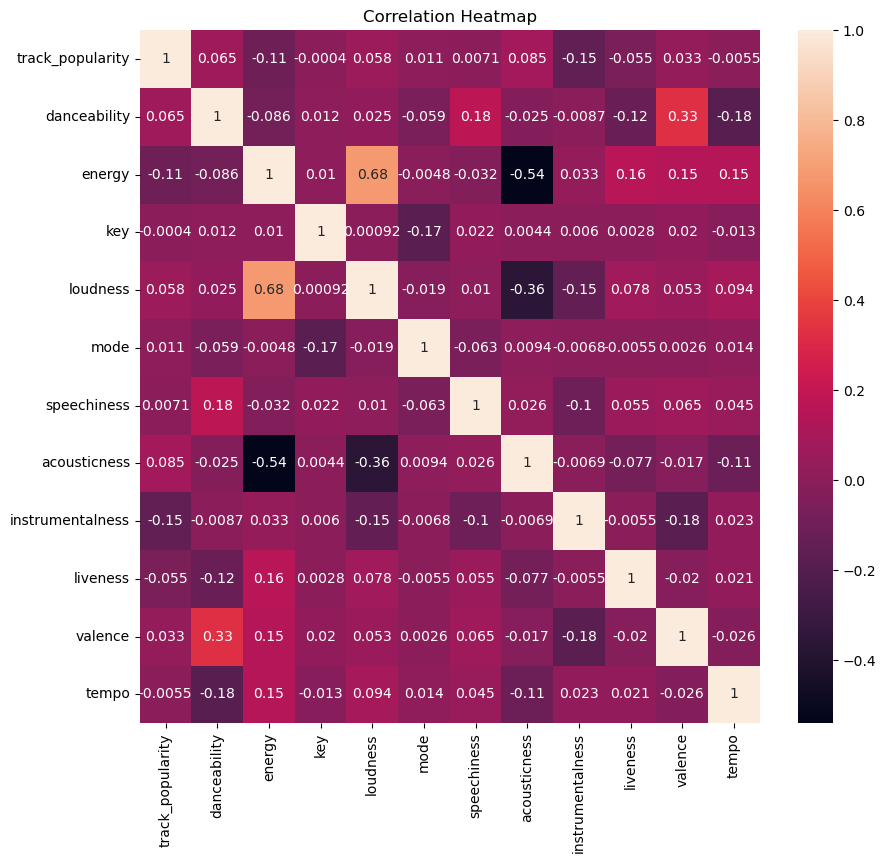

In [30]:
correlation = trainDf[audio_features].corr()
plt.figure(figsize=(10,9))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Random Forest Correlation

Using a Random Forest Classifier, check and visualize the correlation of features against the `track_popularity` feature.

In [31]:
featureFrameRF = selectFeatures(df[audio_features])
featureFrameRF.sort_values(by = 'rfc', ascending = True, inplace = True)

indexRF = np.arange(len(featureFrameRF))
figRF, axRF = plt.subplots(figsize = (10, 7))
selectedFeaturesRF = axRF.barh(indexRF, featureFrameRF['rfc'], 0.5, color = 'blue', label = 'Feature Importance (Random Forest)')
axRF.set(yticks = indexRF, yticklabels = featureFrameRF.index)